# Reporte de Analisis VIII

## Identificando y Excluyendo Outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [2]:
datos = pd.read_csv('./extras/alquiler_residencial.csv', sep=';')
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN,70.00,Casa
2,Local comercial,Ate,0,4,0,150,5200.0,4020.0,1111.0,34.67,Departamento
3,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
4,Departamento,Ate,1,0,0,48,800.0,230.0,NaN,16.67,Departamento
5,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN,17.14,Departamento
6,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
7,Casa en condominio,Ate,5,4,5,750,22000.0,NaN,NaN,29.33,Casa
8,Casa en condominio,El Agustino,2,2,0,65,1000.0,NaN,NaN,15.38,Casa
9,Local comercial,Pachacámac,0,3,0,695,35000.0,19193.0,3030.0,50.36,Departamento


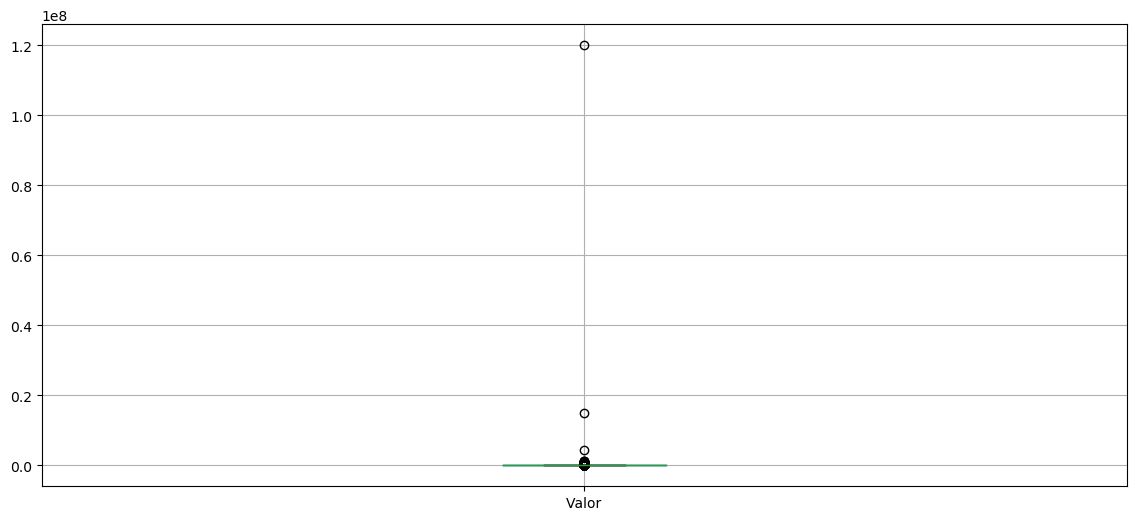

In [3]:
datos.boxplot(['Valor'])

In [4]:
datos[datos['Valor'] >= 500000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
826,Local comercial,Ate,0,0,0,5124,614000.0,NaN,NaN,119.83,Departamento
884,Local comercial,Chorrillos,0,56,0,4235,529375.0,114599.0,34345.0,125.00,Departamento
1163,Local comercial,Puente Piedra,0,47,0,7357,514990.0,166709.0,14787.0,70.00,Departamento
2722,Local comercial,Pachacámac,0,15,0,5666,530000.0,1.0,1.0,93.54,Departamento
2994,Edificio completo,Ate,0,40,0,7500,600000.0,162000.0,13350.0,80.00,Departamento
4595,Almacén,El Agustino,0,5,0,1100,15000000.0,NaN,1000.0,13636.36,Departamento
4628,Edificio completo,Pachacámac,0,0,0,6986,560000.0,NaN,NaN,80.16,Departamento
5565,Local comercial,Pachacámac,0,30,0,4940,612550.0,128440.0,NaN,124.00,Departamento
5592,Edificio completo,Lince,0,15,0,1200,120000000.0,NaN,10000.0,100000.00,Departamento
8067,Edificio completo,Pachacámac,0,90,0,7774,505310.0,NaN,NaN,65.00,Departamento


In [5]:
valor = datos['Valor']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior =  Q1 - 1.5 * IIQ
limite_superior =  Q3 + 1.5 * IIQ

In [6]:
seleccion  =  (valor >= limite_inferior) & (valor <= limite_superior)

In [7]:
datos_new = datos[seleccion]

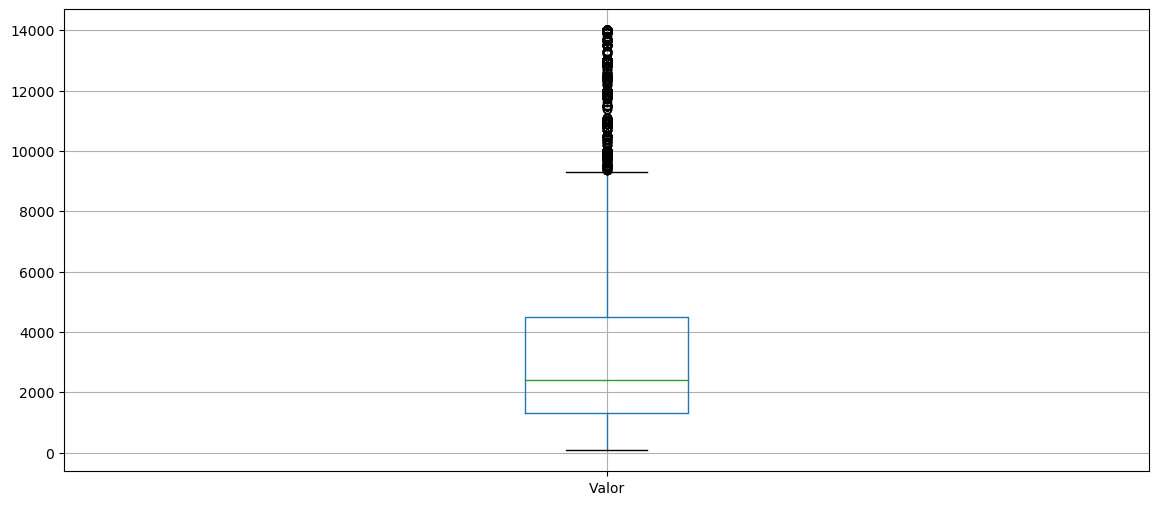

In [8]:
datos_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47b926dc70>]],
      dtype=object)

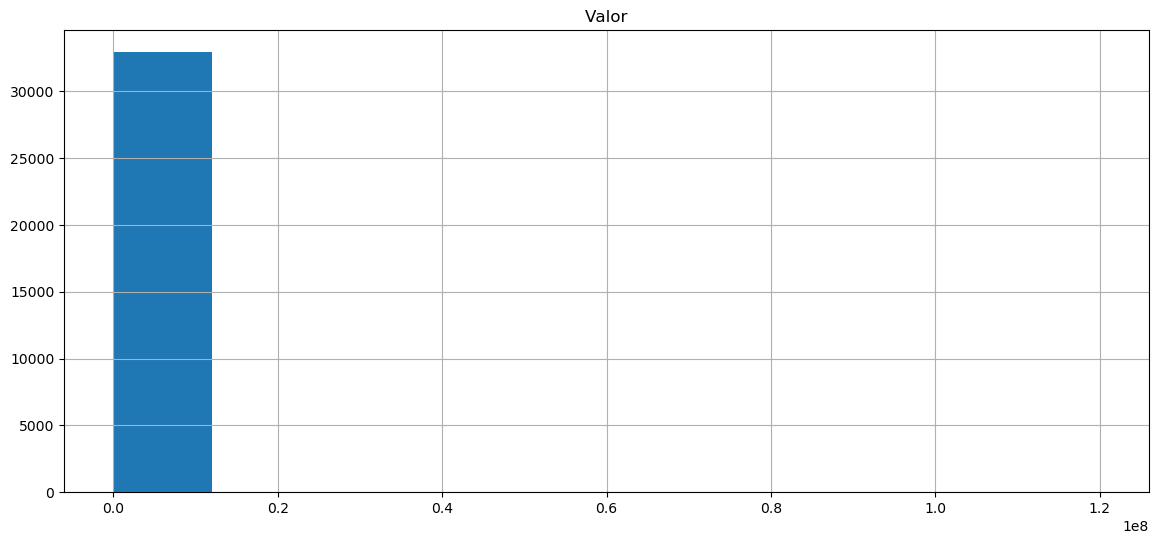

In [9]:
datos.hist(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47b922a4c0>]],
      dtype=object)

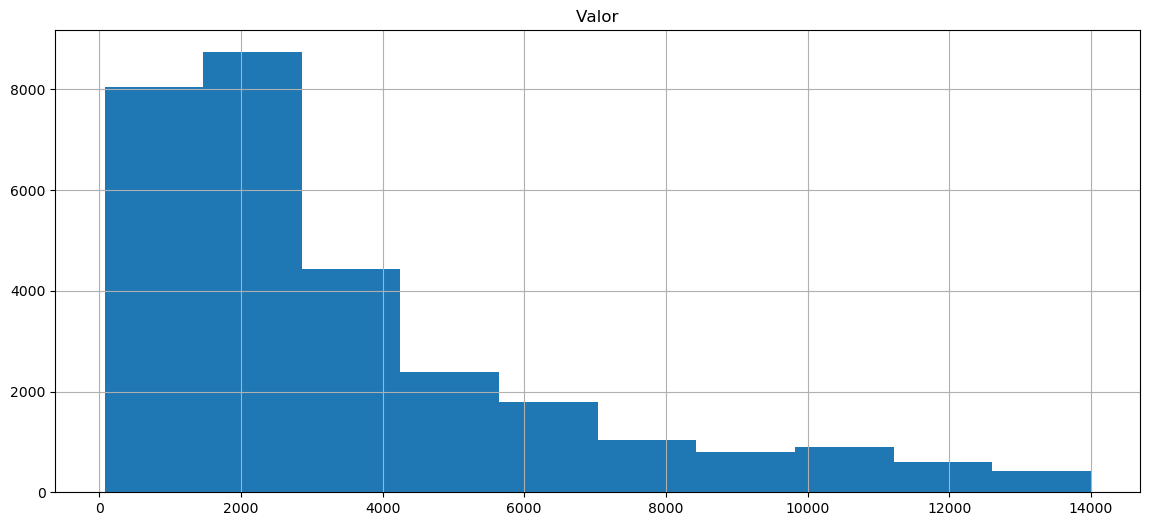

In [10]:
datos_new.hist(['Valor'])

## Ejercicio 

Nuestro objetivo en este ejercicio es obtener el conjunto de estadísticas representadas en la figura anterior. Para ello, descargue aquí el archivo alquiler_muestra.csv y utilícelo para realizar sus análisis utilizando como variable objetivo el Valor m2 (valor del metro cuadrado). Recordando que Q1 representa el primer cuartil y Q3 el tercer cuartil, seleccione el elemento con la respuesta correcta (considere sólo dos casas decimales):

In [11]:
datos2 = pd.read_csv('./extras/alquiler_residencial.csv', sep=';')
datos2.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN,70.00,Casa
2,Local comercial,Ate,0,4,0,150,5200.0,4020.0,1111.0,34.67,Departamento
3,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
4,Departamento,Ate,1,0,0,48,800.0,230.0,NaN,16.67,Departamento
5,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN,17.14,Departamento
6,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
7,Casa en condominio,Ate,5,4,5,750,22000.0,NaN,NaN,29.33,Casa
8,Casa en condominio,El Agustino,2,2,0,65,1000.0,NaN,NaN,15.38,Casa
9,Local comercial,Pachacámac,0,3,0,695,35000.0,19193.0,3030.0,50.36,Departamento


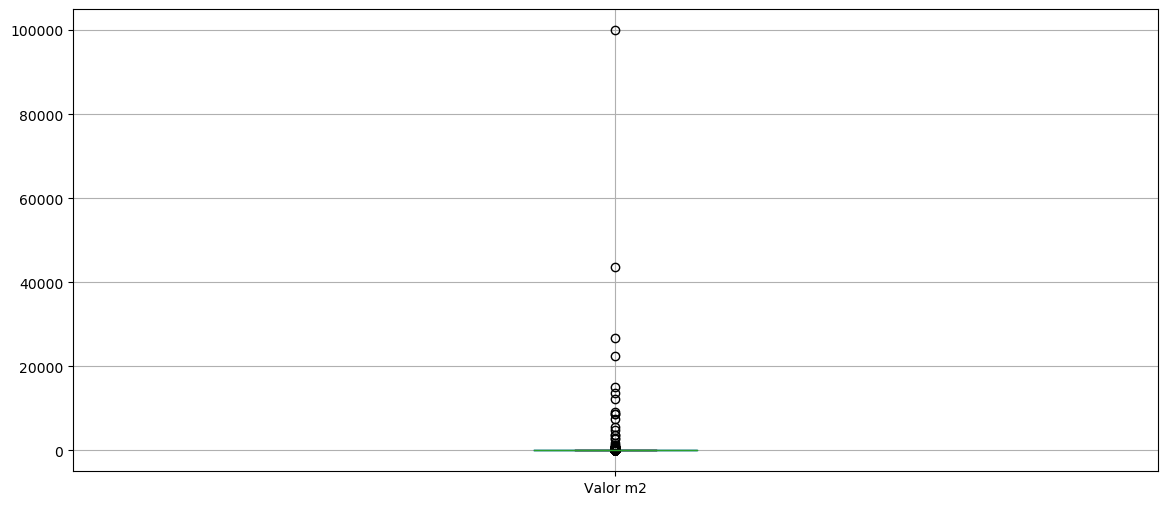

In [12]:
datos2.boxplot(['Valor m2'])

In [13]:
datos2[datos2['Valor m2'] >= 20000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
207,Cochera,San Miguel,0,0,0,0,380.0,NaN,NaN,inf,Departamento
373,Cochera,Pachacámac,0,1,0,0,250.0,NaN,85.0,inf,Departamento
579,Cochera,Pachacámac,0,1,0,0,100.0,NaN,NaN,inf,Departamento
885,Cochera,San Borja,0,9,0,0,450.0,NaN,NaN,inf,Departamento
1014,Cochera,San Borja,0,1,0,0,450.0,NaN,NaN,inf,Departamento
...,...,...,...,...,...,...,...,...,...,...,...
30071,Cochera,Pachacámac,0,2,0,0,450.0,NaN,NaN,inf,Departamento
30261,Cochera,Pachacámac,0,1,0,0,100.0,NaN,74.0,inf,Departamento
30690,Local comercial,Comas,0,1,0,30,800000.0,1700.0,258.0,26666.67,Departamento
31646,Cochera,Pachacámac,0,0,0,0,150.0,NaN,NaN,inf,Departamento


In [14]:
# valor2 = datos2['Valor m2']
# Q1 = valor2.quantile(21.25)
# Q3 = valor2.quantile(42.31)
# IIQ = Q3 - Q1
# limite_inferior =  Q1 - 1.5 * IIQ
# limite_superior =  Q3 + 1.5 * IIQ

## Identificando y Excluyendo Outliers (continuacion)

(75.0, 120000000.0)

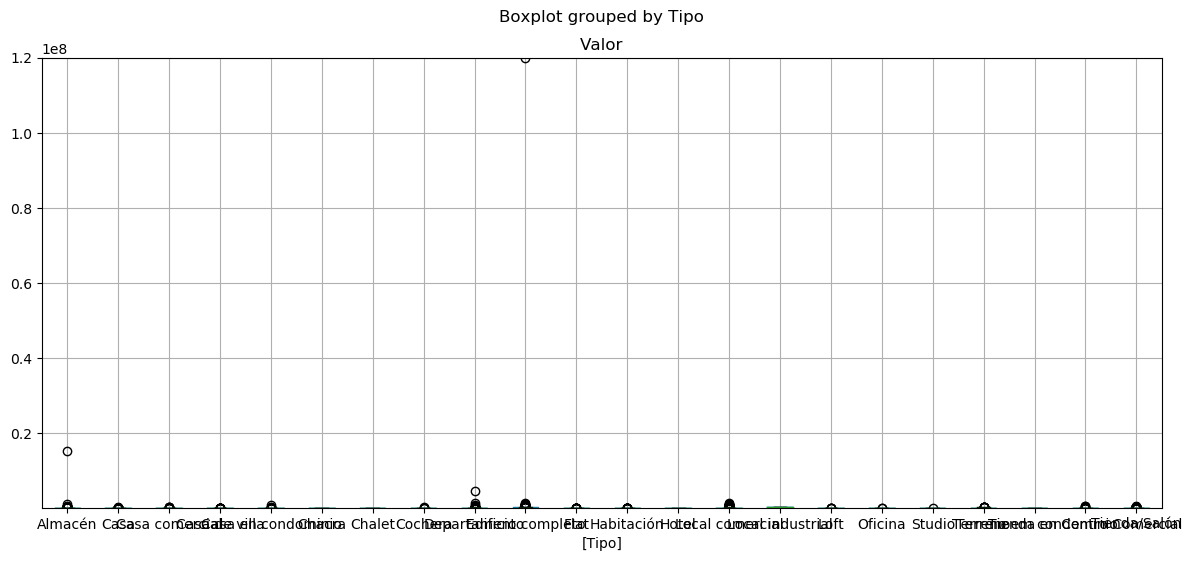

In [17]:
datos.boxplot(['Valor'], by = ['Tipo']).set_ylim((datos.Valor.min(), datos.Valor.max()))

In [21]:
grupo_tipo = datos.groupby('Tipo')['Valor']

In [22]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [23]:
grupo_tipo.groups

{'Almacén': Int64Index([   80,    84,   120,   149,   318,   326,   350,   353,   429,
               494,
             ...
             32475, 32494, 32578, 32635, 32705, 32750, 32814, 32837, 32897,
             32899],
            dtype='int64', length=623),
 'Casa': Int64Index([    1,    31,    74,    82,   138,   142,   216,   236,   269,
               357,
             ...
             32613, 32644, 32652, 32732, 32739, 32778, 32859, 32893, 32911,
             32931],
            dtype='int64', length=967),
 'Casa comercial': Int64Index([   83,   204,   287,   490,   668,   725,   829,   850,   930,
               964,
             ...
             31088, 31322, 31426, 31563, 32015, 32076, 32079, 32263, 32461,
             32752],
            dtype='int64', length=265),
 'Casa de villa': Int64Index([  117,   312,   324,   459,   504,  1052,  1239,  1271,  1377,
              1515,
             ...
             32041, 32048, 32137, 32245, 32282, 32302, 32620, 32686, 32804,
       

In [24]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [25]:
Q1

Tipo
Almacén                         7000.0
Casa                            1100.0
Casa comercial                  6000.0
Casa de villa                    750.0
Casa en condominio              4000.0
Chacra                          4900.0
Chalet                          1480.0
Cochera                          250.0
Departamento                    1600.0
Edificio completo              14900.0
Flat                            2500.0
Habitación                       900.0
Hotel                          18500.0
Local comercial                 1000.0
Local industrial              120000.0
Loft                            1750.0
Oficina                         9750.0
Studio                          1500.0
Terreno                         8000.0
Terreno em condominio          14000.0
Tienda en Centro Comercial      1500.0
Tienda/Salón                    2200.0
Name: Valor, dtype: float64

In [26]:
Q3

Tipo
Almacén                        27750.0
Casa                            9800.0
Casa comercial                 18000.0
Casa de villa                   1800.0
Casa en condominio             15250.0
Chacra                          4900.0
Chalet                          1480.0
Cochera                          450.0
Departamento                    5000.0
Edificio completo              80000.0
Flat                            6000.0
Habitación                      1500.0
Hotel                          31500.0
Local comercial                 9950.0
Local industrial              120000.0
Loft                            3000.0
Oficina                        15000.0
Studio                          2450.0
Terreno                        40000.0
Terreno em condominio          25000.0
Tienda en Centro Comercial      5500.0
Tienda/Salón                   12000.0
Name: Valor, dtype: float64

In [27]:
IIQ

Tipo
Almacén                       20750.0
Casa                           8700.0
Casa comercial                12000.0
Casa de villa                  1050.0
Casa en condominio            11250.0
Chacra                            0.0
Chalet                            0.0
Cochera                         200.0
Departamento                   3400.0
Edificio completo             65100.0
Flat                           3500.0
Habitación                      600.0
Hotel                         13000.0
Local comercial                8950.0
Local industrial                  0.0
Loft                           1250.0
Oficina                        5250.0
Studio                          950.0
Terreno                       32000.0
Terreno em condominio         11000.0
Tienda en Centro Comercial     4000.0
Tienda/Salón                   9800.0
Name: Valor, dtype: float64

In [28]:
limite_inferior

Tipo
Almacén                       -24125.0
Casa                          -11950.0
Casa comercial                -12000.0
Casa de villa                   -825.0
Casa en condominio            -12875.0
Chacra                          4900.0
Chalet                          1480.0
Cochera                          -50.0
Departamento                   -3500.0
Edificio completo             -82750.0
Flat                           -2750.0
Habitación                         0.0
Hotel                          -1000.0
Local comercial               -12425.0
Local industrial              120000.0
Loft                            -125.0
Oficina                         1875.0
Studio                            75.0
Terreno                       -40000.0
Terreno em condominio          -2500.0
Tienda en Centro Comercial     -4500.0
Tienda/Salón                  -12500.0
Name: Valor, dtype: float64

In [29]:
limite_superior

Tipo
Almacén                        58875.0
Casa                           22850.0
Casa comercial                 36000.0
Casa de villa                   3375.0
Casa en condominio             32125.0
Chacra                          4900.0
Chalet                          1480.0
Cochera                          750.0
Departamento                   10100.0
Edificio completo             177650.0
Flat                           11250.0
Habitación                      2400.0
Hotel                          51000.0
Local comercial                23375.0
Local industrial              120000.0
Loft                            4875.0
Oficina                        22875.0
Studio                          3875.0
Terreno                        88000.0
Terreno em condominio          41500.0
Tienda en Centro Comercial     11500.0
Tienda/Salón                   26700.0
Name: Valor, dtype: float64

In [30]:
limite_superior['Casa']

22850.0

In [31]:
datos_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = datos['Tipo'] == tipo
    eh_dentro_limite = (datos['Valor'] >= limite_inferior[tipo]) & (datos['Valor'] <= limite_superior[tipo])
    seleccion = eh_tipo & eh_dentro_limite
    datos_seleccion = datos[seleccion]
    datos_new = pd.concat([datos_new, datos_seleccion])

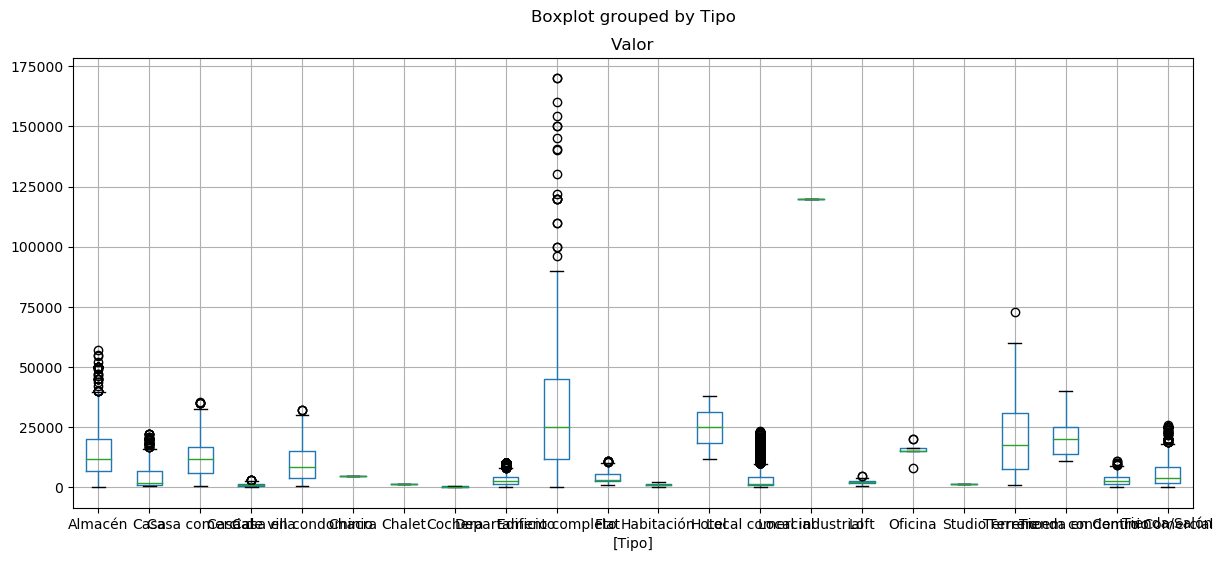

In [32]:
datos_new.boxplot(['Valor'], by = ['Tipo'])

In [33]:
datos_new.to_csv('alquiler_residencial_sin_outliers.csv', sep = ';', index = False)